 Task 2: Quantitative Analysis (TA-Lib + PyNance fallback)

# Step 1: Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance as pn

df = pd.read_csv("../data/Data/AAPL.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


# STEP 2 — Prepare the data

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Keep the needed columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-01-02,2.575630,2.730385,2.554037,2.721686,746015200
2009-01-05,2.794266,2.884539,2.780469,2.836553,1181608400
2009-01-06,2.877641,2.914229,2.770872,2.789767,1289310400
2009-01-07,2.753477,2.774170,2.706990,2.729484,753048800
2009-01-08,2.712090,2.793666,2.700393,2.780169,673500800


# STEP 3 — TA-Lib Indicators


In [4]:
# Simple Moving Average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)

# Exponential Moving Average
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

# RSI
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Bollinger Bands
df['Upper_BB'], df['Middle_BB'], df['Lower_BB'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2
)

# MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

df.tail()



,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,RSI,Upper_BB,Middle_BB,Lower_BB,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,,,,,
2023-12-22,193.353962,193.581821,191.164647,191.788757,37149600,191.856618,183.572859,191.510231,54.672784,197.478146,191.856618,186.235090,2.633141,3.235256,-0.602115
2023-12-26,191.798670,192.076049,191.025969,191.243912,28919300,192.018094,183.858864,191.484867,53.090049,197.367843,192.018094,186.668345,2.304751,3.049155,-0.744404
2023-12-27,190.689158,191.689703,189.302247,191.342972,48087700,192.154308,184.149424,191.471353,53.354446,197.285152,192.154308,187.023465,2.029104,2.845145,-0.816041
2023-12-28,192.323710,192.838849,191.362784,191.768951,34049900,192.362839,184.479567,191.499696,54.540999,197.056446,192.362839,187.669231,1.823998,2.640915,-0.816918
2023-12-29,192.085953,192.581275,189.936256,190.728775,42672100,192.490633,184.814828,191.426275,51.121347,196.848102,192.490633,188.133164,1.559539,2.424640,-0.865101


# Step 4 — Financial Metrics (PyNance)



Financial Metrics Summary:
           Returns  Cumulative_Returns  Volatility_30
count  3773.000000         3773.000000    3744.000000
mean      0.001289           19.787261       0.016738
std       0.018010           20.231959       0.006618
min      -0.128647            0.861708       0.005085
25%      -0.007547            5.533004       0.012326
50%       0.001062            9.912274       0.015233
75%       0.010770           27.438268       0.019353
max       0.119808           72.108452       0.060224


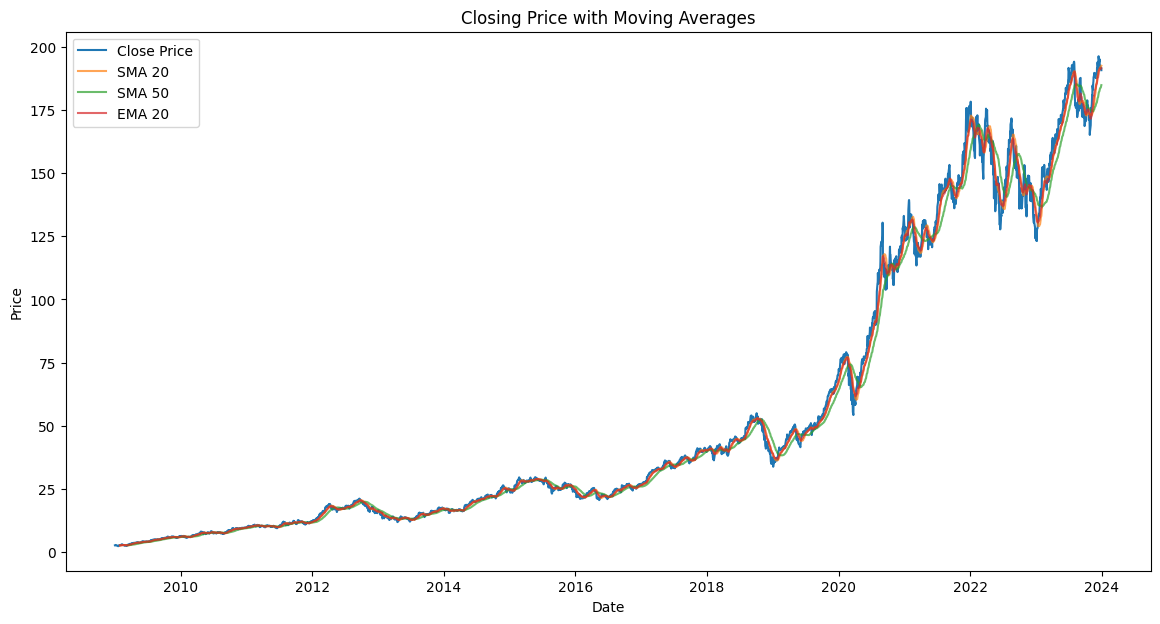

In [6]:
# Daily Returns
df['Returns'] = df['Close'].pct_change()  # percent change from previous day

# Cumulative Returns
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()

# Rolling Volatility (30-day)
df['Volatility_30'] = df['Returns'].rolling(window=30).std()

print("\nFinancial Metrics Summary:")
print(df[['Returns','Cumulative_Returns','Volatility_30']].describe())

# Plot Closing Price with Moving Averages
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20', alpha=0.7)
plt.plot(df['SMA_50'], label='SMA 50', alpha=0.7)
plt.plot(df['EMA_20'], label='EMA 20', alpha=0.7)
plt.title("Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# Step 5 — Visualizations


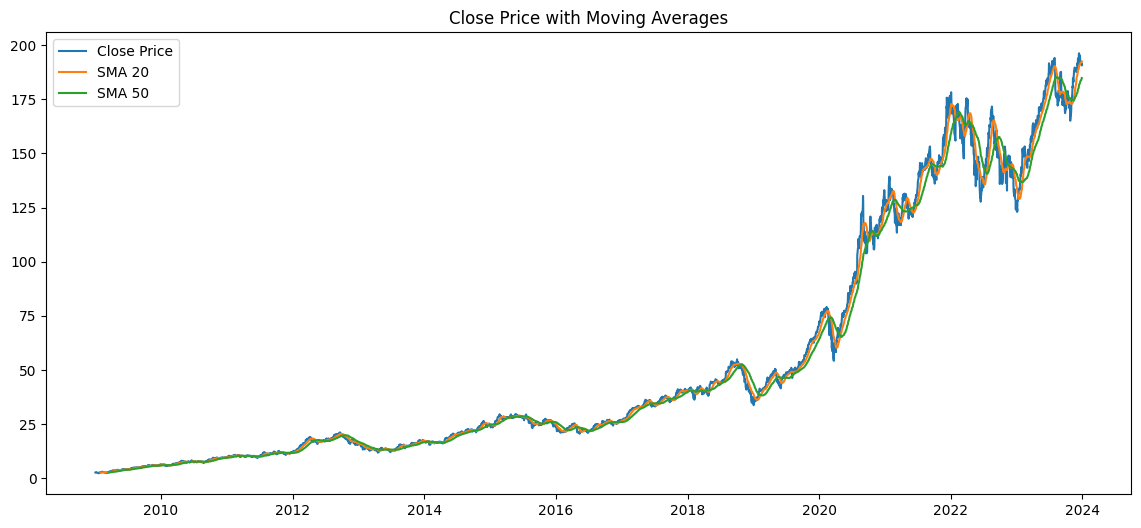

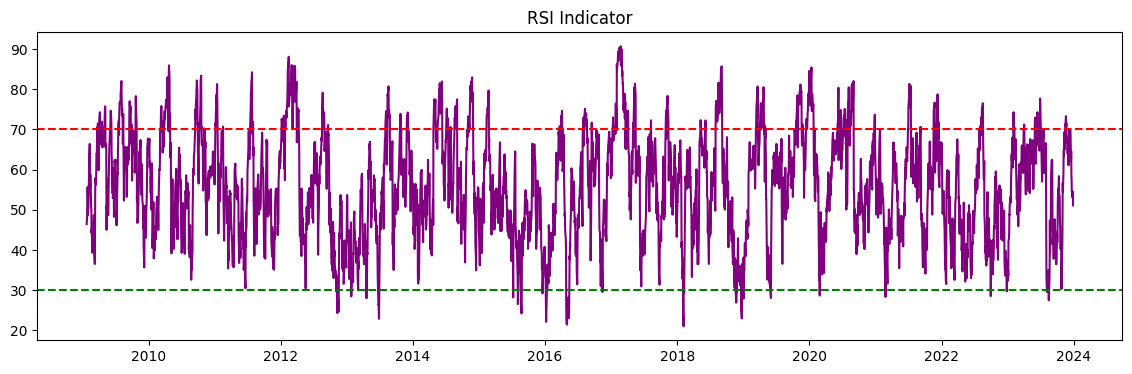

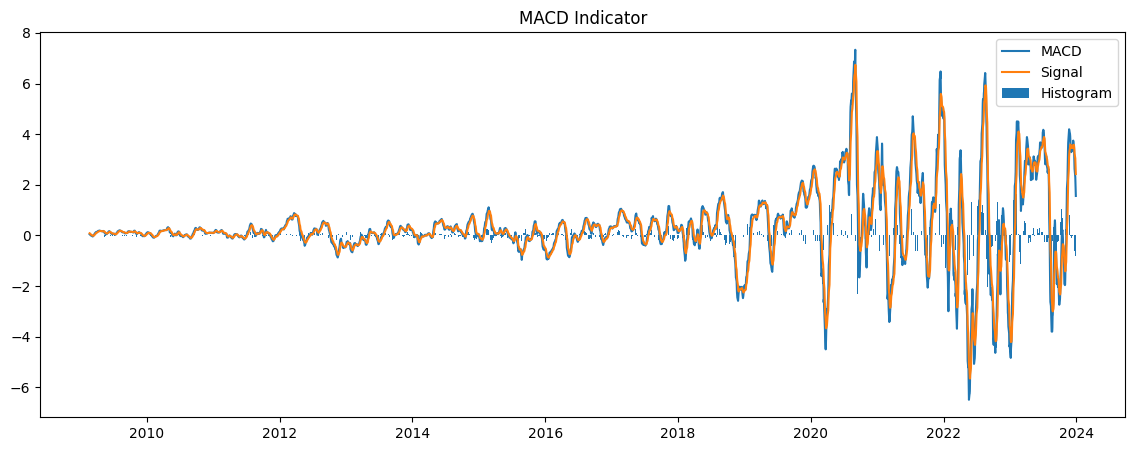

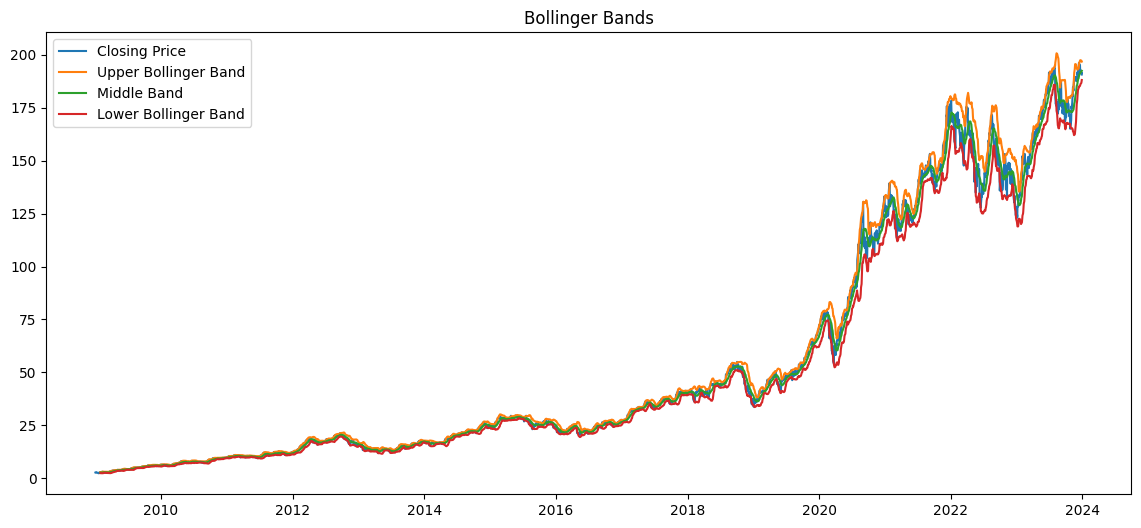

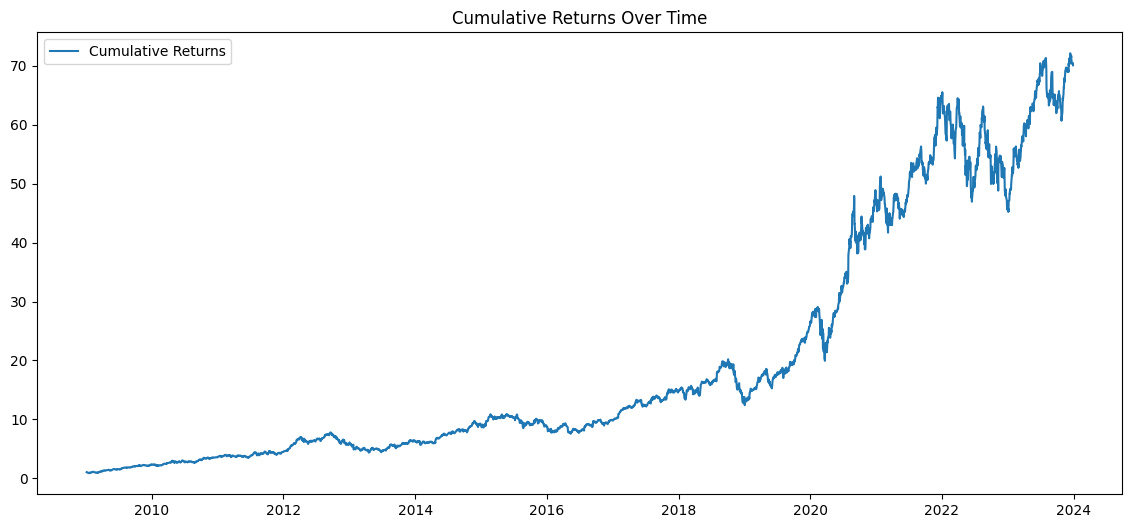

In [7]:
# --- Close Price with SMAs ---
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20')
plt.plot(df['SMA_50'], label='SMA 50')
plt.title("Close Price with Moving Averages")
plt.legend()
plt.show()

# --- RSI ---
plt.figure(figsize=(14,4))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()

# --- MACD ---
plt.figure(figsize=(14,5))
plt.plot(df['MACD'], label='MACD')
plt.plot(df['MACD_Signal'], label='Signal')
plt.bar(df.index, df['MACD_Hist'], label='Histogram')
plt.title("MACD Indicator")
plt.legend()
plt.show()

# --- Bollinger Bands ---
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['Upper_BB'], label='Upper Bollinger Band')
plt.plot(df['Middle_BB'], label='Middle Band')
plt.plot(df['Lower_BB'], label='Lower Bollinger Band')
plt.title("Bollinger Bands")
plt.legend()
plt.show()

# --- Cumulative Returns ---
plt.figure(figsize=(14,6))
plt.plot(df['Cumulative_Returns'], label='Cumulative Returns')
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.show()